In [ ]:
from splinter import Browser
from bs4 import BeautifulSoup as soup
from webdriver_manager.chrome import ChromeDriverManager
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as dt
from datetime import timedelta
from datetime import datetime

In [2]:
executable_path = { 'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)

In [3]:
url_temp = "https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html"

In [4]:
browser.visit(url_temp)

In [5]:
html=browser.html
soup = soup(html,'html.parser')

In [6]:
print(soup)

<html lang="en"><head>
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<meta content="" name="description"/>
<meta content="Mark Otto, Jacob Thornton, and Bootstrap contributors" name="author"/>
<meta content="Hugo 0.84.0" name="generator"/>
<title>Mars Temperature Data</title>
<link href="https://getbootstrap.com/docs/5.0/examples/jumbotron/" rel="canonical"/>
<!-- Bootstrap core CSS -->
<link crossorigin="anonymous" href="https://stackpath.bootstrapcdn.com/bootstrap/4.3.1/css/bootstrap.min.css" integrity="sha384-ggOyR0iXCbMQv3Xipma34MD+dH/1fQ784/j6cY/iJTQUOhcWr7x9JvoRxT2MZw1T" rel="stylesheet"/>
<style>
    .bd-placeholder-img {
      font-size: 1.125rem;
      text-anchor: middle;
      -webkit-user-select: none;
      -moz-user-select: none;
      user-select: none;
    }

    @media (min-width: 768px) {
      .bd-placeholder-img-lg {
        font-size: 3.5rem;
      }
    }
  </style>
</head>
<body>
<main>
<div class="container py-4">


In [7]:
df = pd.read_html('https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html')[0]
df.head()

id terrestrial_date  sol   ls  month  min_temp  pressure
0   2       2012-08-16   10  155      6     -75.0     739.0
1  13       2012-08-17   11  156      6     -76.0     740.0
2  24       2012-08-18   12  156      6     -76.0     741.0
3  35       2012-08-19   13  157      6     -74.0     732.0
4  46       2012-08-20   14  157      6     -74.0     740.0

In [8]:
df.iloc[1:]

id terrestrial_date   sol   ls  month  min_temp  pressure
1       13       2012-08-17    11  156      6     -76.0     740.0
2       24       2012-08-18    12  156      6     -76.0     741.0
3       35       2012-08-19    13  157      6     -74.0     732.0
4       46       2012-08-20    14  157      6     -74.0     740.0
5       57       2012-08-21    15  158      6     -78.0     740.0
...    ...              ...   ...  ...    ...       ...       ...
1862  1889       2018-02-23  1973  133      5     -78.0     730.0
1863  1892       2018-02-24  1974  134      5     -77.0     729.0
1864  1894       2018-02-25  1975  134      5     -76.0     729.0
1865  1893       2018-02-26  1976  135      5     -77.0     728.0
1866  1895       2018-02-27  1977  135      5     -77.0     727.0

[1866 rows x 7 columns]

In [9]:
df.dtypes

id                    int64
terrestrial_date     object
sol                   int64
ls                    int64
month                 int64
min_temp            float64
pressure            float64
dtype: object

In [10]:
df['terrestrial_date']= pd.to_datetime(df['terrestrial_date'])


In [11]:
df.dtypes

id                           int64
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

In [12]:
df.describe()

id          sol           ls        month     min_temp  \
count  1867.000000  1867.000000  1867.000000  1867.000000  1867.000000   
mean    955.551152  1015.670059   168.865024     6.141939   -76.121050   
std     545.048507   565.342298   105.599153     3.506493     5.504098   
min       2.000000    10.000000     0.000000     1.000000   -90.000000   
25%     489.500000   546.500000    78.000000     3.000000   -80.000000   
50%     959.000000  1028.000000   160.000000     6.000000   -76.000000   
75%    1425.500000  1505.500000   257.500000     9.000000   -72.000000   
max    1895.000000  1977.000000   359.000000    12.000000   -62.000000   

          pressure  
count  1867.000000  
mean    841.066417  
std      54.253226  
min     727.000000  
25%     800.000000  
50%     853.000000  
75%     883.000000  
max     925.000000

In [ ]:
 import numpy as np
nb_of_months=df['month'].nunique()
print(f'There are', nb_of_months ,'months on Mars.')
# Find the number of months?
 

In [14]:
# How many Martian (and not Earth) days worth of data exist in the scraped dataset?
first_day_of_data=df['sol'].min()
last_day_of_data = df['sol'].max()
unique_days_date=df['sol'].nunique()
print(f'There are', unique_days_date, 'Martian days worth of data in the'
      'dataset, spreading from day',first_day_of_data, 'to day',last_day_of_data,'. It is worth noting that in some'
     'days data is taken multiple times. ')


There are 1867 Martian days worth of data in thedataset, spreading from day 10 to day 1977 . It is worth noting that in somedays data is taken multiple times. 


In [15]:
df_temp  = df.groupby('month', as_index=False).agg({ 'min_temp' : np.mean})
df_temp

# What are the coldest and the warmest months on Mars?
#   month 3 & 4 is the coldest
#   month 8 is warmest

month   min_temp
0       1 -77.160920
1       2 -79.932584
2       3 -83.307292
3       4 -82.747423
4       5 -79.308725
5       6 -75.299320
6       7 -72.281690
7       8 -68.382979
8       9 -69.171642
9      10 -71.982143
10     11 -71.985507
11     12 -74.451807

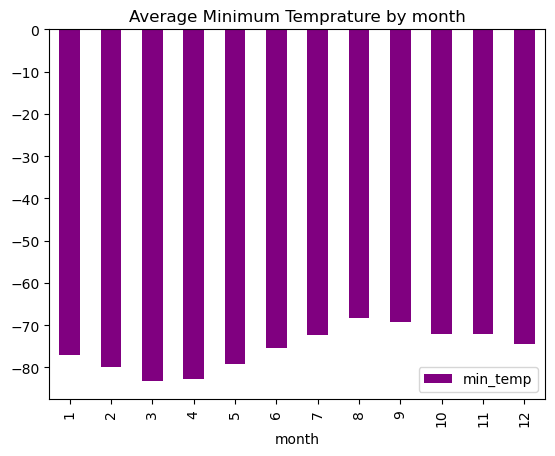

In [16]:
df_temp.plot.bar(x='month',y='min_temp',color='purple');
plt.title('Average Minimum Temprature by month')
plt.show()

In [17]:
warmest_month = df_temp['min_temp'].min()
month_min_temp = df_temp.loc[df_temp['min_temp']==warmest_month]
month_min_temp
# month 3 is warmest

month   min_temp
2      3 -83.307292

In [18]:
coldest_month = df_temp['min_temp'].max()
month_max_temp = df_temp.loc[df_temp['min_temp']==coldest_month]
month_max_temp
# month 8 is coldest

month   min_temp
7      8 -68.382979

In [19]:
df_pressure = df.groupby('month',as_index=False).agg({'pressure' : np.mean})
df_pressure

# Which months have the lowest and the highest atmospheric pressure on Mars?
#   month 6 have lowest pressure
#   month 9 have highest pressure

month    pressure
0       1  862.488506
1       2  889.455056
2       3  877.322917
3       4  806.329897
4       5  748.557047
5       6  745.054422
6       7  795.105634
7       8  873.829787
8       9  913.305970
9      10  887.312500
10     11  857.014493
11     12  842.156627

In [20]:
min_pressure = df_pressure['pressure'].min()
month_min_pressure = df_pressure.loc[df_pressure['pressure']==min_pressure]
month_min_pressure

month    pressure
5      6  745.054422

In [21]:
max_pressure = df_pressure['pressure'].max()
month_max_pressure = df_pressure.loc[df_pressure['pressure']==max_pressure]
month_max_pressure

month   pressure
8      9  913.30597

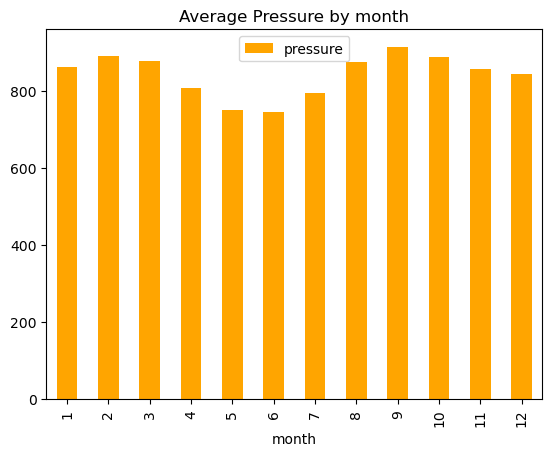

In [22]:
df_pressure.plot.bar(x='month',y='pressure',color='orange')
plt.title('Average Pressure by month')
plt.show()

In [23]:
original_long = df['ls'].loc[0]
original_long

155

In [24]:
same_long = df.loc[df['ls']==original_long]
same_long

id terrestrial_date   sol   ls  month  min_temp  pressure
0        2       2012-08-16    10  155      6     -75.0     739.0
598    621       2014-07-03   678  155      6     -77.0     739.0
599    624       2014-07-04   679  155      6     -77.0     738.0
1249  1274       2016-05-20  1346  155      6     -75.0     737.0
1250  1277       2016-05-21  1347  155      6     -75.0     736.0

In [25]:
sun = same_long['terrestrial_date'].loc[0]
date_after_martial_year = same_long['terrestrial_date'].iloc[1]
martial_year= date_after_martial_year-sun
print(f'In Martial year',martial_year,'pass the Earth')

In Martial year 686 days 00:00:00 pass the Earth


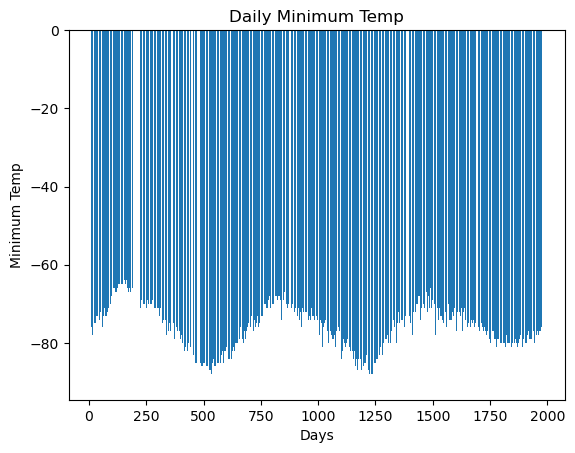

In [29]:
plt.bar(df['sol'],df['min_temp'])
plt.xlabel('Days')
plt.ylabel('Minimum Temp')
plt.title('Daily Minimum Temp')
plt.show()

In [30]:
# Mars circles Sun 3 times in 2000 days.

In [31]:
df.to_csv('mars_table.csv',index=False)

In [32]:
browser.quit()